In [ ]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import ZeroPadding2D, Conv2D, MaxPooling2D, Dropout,Flatten, Activation,AveragePooling2D, Dense

In [ ]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [ ]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/models/facial_expression_model_weights.h5')

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
base_model_output = Sequential()
base_model_output = Convolution2D(6, (1, 1), )(model.layers[-4].output)
base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)

In [ ]:
model = Model(inputs=model.input, outputs=base_model_output)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# model.load_weights('/content/drive/MyDrive/Colab Notebooks/models/race_model_weights.h5')

In [ ]:
from keras.models import load_model
import cv2
from keras.preprocessing.image import image, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
race_dict = {0:'Asian', 1:'Black', 2:'Indian', 3:'Latino_Hispanic', 4:'Middle Eastern', 5:'White'}

In [ ]:
def classify(img_path, classifier):
  img = load_img(img_path, target_size= (224,224) )
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img /= 255
  prediction = np.argmax(classifier.predict(img), axis=1)[0]
  return prediction

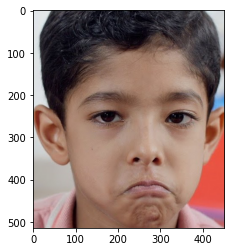

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/images/8 year sad_indian_boy.jpg')
plt.imshow(img)

In [ ]:
emotion_model = load_model('/content/drive/MyDrive/Colab Notebooks/models/emotion_model.h5')

In [ ]:
classify('/content/drive/MyDrive/Colab Notebooks/images/76 years smiling morgan frreman.jpg', race_model)

5

In [ ]:
classify('/content/drive/MyDrive/Colab Notebooks/images/76 years smiling morgan frreman.jpg', model)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


3

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/race_model.h5')

In [ ]:
['Asian', 'Indian', 'Black', 'White', 'Middle Eastern',
       'Latino_Hispanic']

In [ ]:
def sefiks(img_path):
  img = load_img(img_path, grayscale=True, target_size= (48,48) )
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img /= 255
  prediction = np.argmax(model.predict(img), axis=1)[0]
  return prediction

In [ ]:
def mines(img_path):
  img = load_img(img_path, grayscale=False, target_size= (224,224) )
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img /= 255
  prediction = np.argmax(emotion_model.predict(img), axis=1)[0]
  return prediction

In [ ]:
sefiks('/content/drive/MyDrive/Colab Notebooks/images/man-making-angry-face.jpg')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


3

In [ ]:
mines('/content/drive/MyDrive/Colab Notebooks/images/6 years happy_african_child.jpg')

NameError: ignored

In [ ]:
race_model = load_model('/content/drive/MyDrive/Colab Notebooks/models/race_model.h5')

In [ ]:
classify('/content/drive/MyDrive/Colab Notebooks/images/6 years happy_african_child.jpg', race_model)

2